In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Nacimientos_por_residencia_departamento_de_Caldas_20260204.csv'

df = pd.read_csv(file_path)


print("Dataset Info")
print(df.info())
print("Prim filas dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129938 entries, 0 to 129937
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   COD_DPTO    129938 non-null  int64  
 1   COD_MUNIC   129938 non-null  int64  
 2   AREANAC     129938 non-null  int64  
 3   SIT_PARTO   129938 non-null  int64  
 4   SEXO        129938 non-null  int64  
 5   PESO_NAC    129938 non-null  object 
 6   TALLA_NAC   129938 non-null  int64  
 7   ANO         129938 non-null  object 
 8   MES         129938 non-null  int64  
 9   T_GES       129938 non-null  int64  
 10  NUMCONSUL   129937 non-null  float64
 11  TIPO_PARTO  129938 non-null  int64  
 12  MUL_PARTO   129938 non-null  int64  
 13  IDPERTET    58291 non-null   float64
 14  EDAD_MADRE  129938 non-null  int64  
 15  N_HIJOSV    129938 non-null  int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 15.9+ MB
None
Prim filas dataset
   COD_DPTO  COD_MUNIC  AREANAC 


Valores faltantes por columna:
COD_DPTO          0
COD_MUNIC         0
AREANAC           0
SIT_PARTO         0
SEXO              0
PESO_NAC          0
TALLA_NAC         0
ANO               0
MES               0
T_GES             0
NUMCONSUL         1
TIPO_PARTO        0
MUL_PARTO         0
IDPERTET      71647
EDAD_MADRE        0
N_HIJOSV          0
dtype: int64


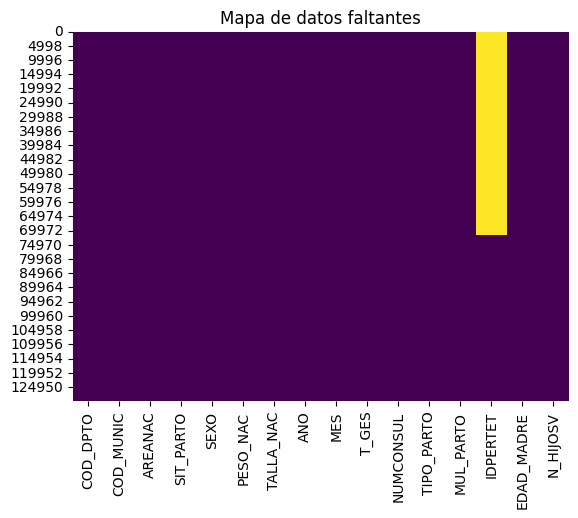

In [4]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

Se eliminaron las filas con datos faltantes

Número de filas después de eliminar datos faltantes: 58291
Se muestra nro de filas después de la limpieza

Datos faltantes por columna después de la limpieza:
COD_DPTO      0
COD_MUNIC     0
AREANAC       0
SIT_PARTO     0
SEXO          0
PESO_NAC      0
TALLA_NAC     0
ANO           0
MES           0
T_GES         0
NUMCONSUL     0
TIPO_PARTO    0
MUL_PARTO     0
IDPERTET      0
EDAD_MADRE    0
N_HIJOSV      0
dtype: int64


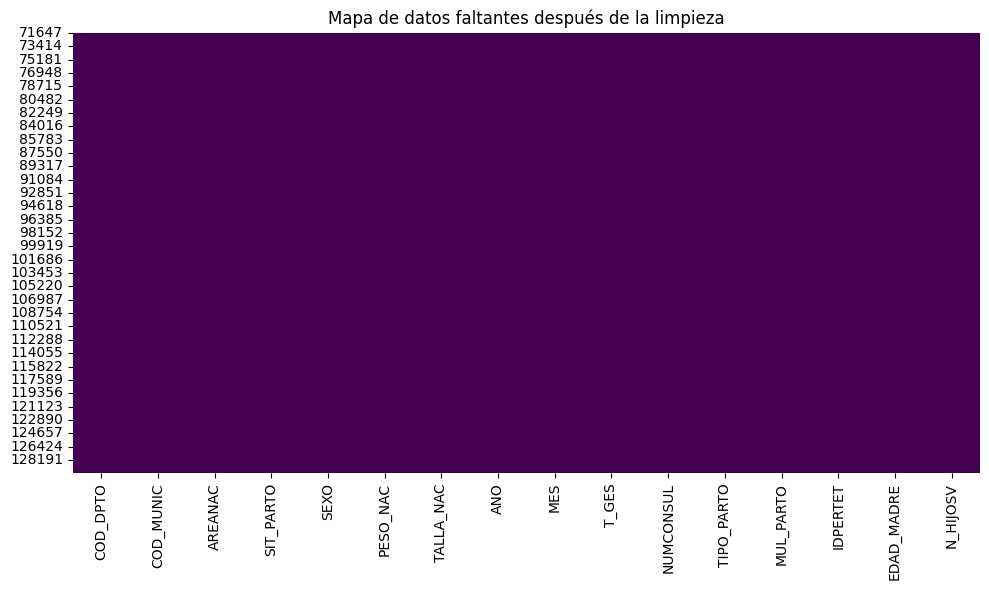

In [5]:
df_filtrado = df.dropna()
print("Se eliminaron las filas con datos faltantes")

print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")
print("Se muestra nro de filas después de la limpieza")

faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

plt.figure(figsize=(10, 6)) # Cambiando la altura de 2 a 6 para una mejor visualización
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()

plt.show()

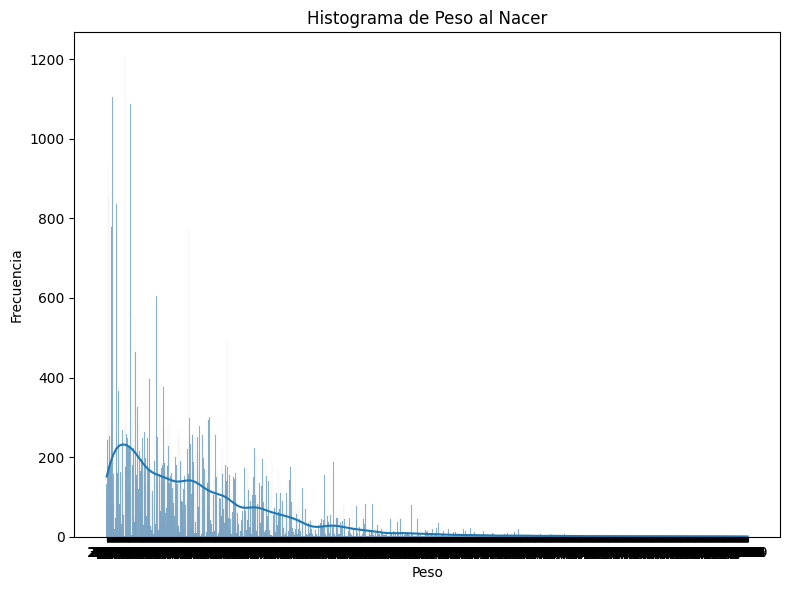

In [ ]:
#Histogramas
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Peso
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['PESO_NAC'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso al Nacer')
plt.tight_layout()
plt.show()

# Histograma para Talla
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['TALLA_NAC'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.title('Histograma de Talla al Nacer')
plt.tight_layout()
plt.show()

# Histograma para Tiempo de Gestación
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['T_GES'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Tiempo de Gestación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de Gestación')
plt.tight_layout()
plt.show()

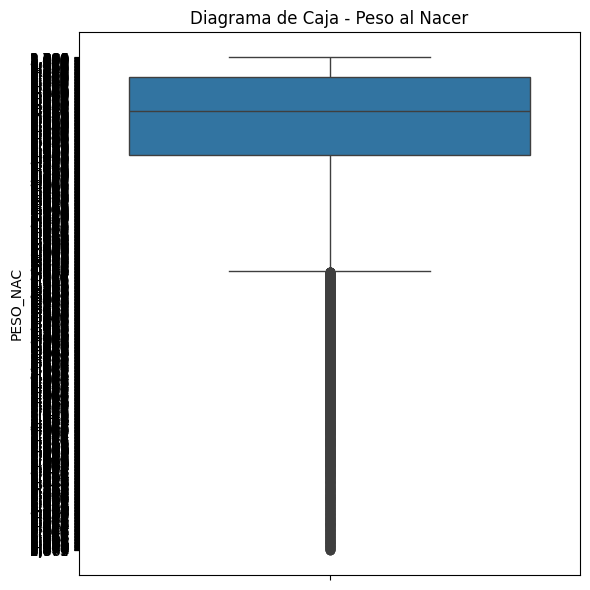

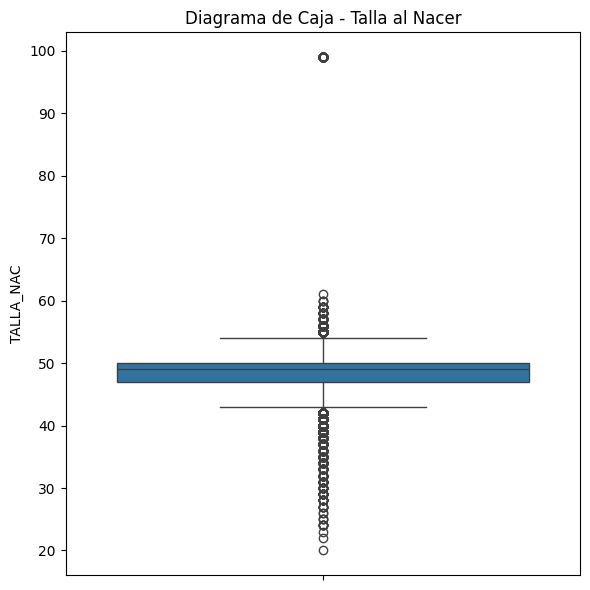

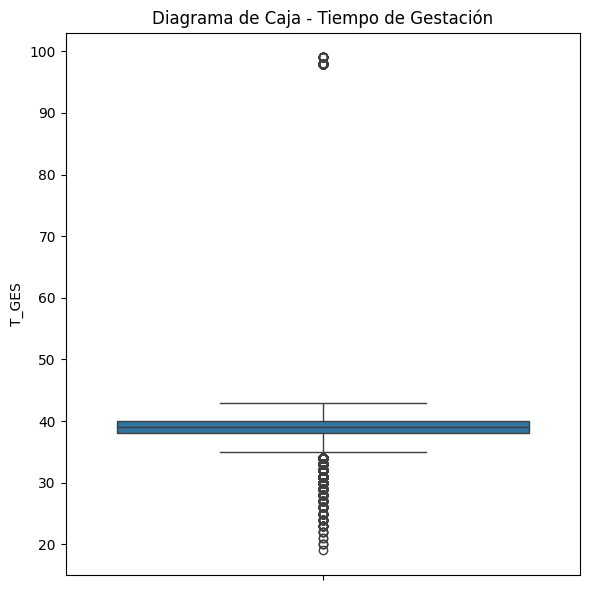

In [7]:
#diagrama de cajas

import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Peso
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['PESO_NAC'])
plt.title('Diagrama de Caja - Peso al Nacer')
plt.tight_layout()
plt.show()

# Diagrama de caja para Talla
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['TALLA_NAC'])
plt.title('Diagrama de Caja - Talla al Nacer')
plt.tight_layout()
plt.show()

# Diagrama de caja para Tiempo de Gestación
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['T_GES'])
plt.title('Diagrama de Caja - Tiempo de Gestación')
plt.tight_layout()
plt.show()

# ***Analisis de las anomalías***

***Para 'TALLA_NAC' (Talla al Nacer):***

Histograma: Después de la eliminación de atípicos, el histograma de la talla muestra una distribución con una forma aproximadamente acampanada, concentrada alrededor de los valores centrales (aproximadamente entre 47 y 50 cm). Aunque es mayormente simétrica, no es perfectamente normal, lo que se traduce en las colas no coincidiendo perfectamente con las de una distribución gaussiana ideal.
Diagrama de Caja: El diagrama de caja presenta una caja compacta, indicando que la mayoría de los datos están estrechamente agrupados. La mediana está bien centrada dentro de la caja, y los bigotes son de longitud razonable, sin puntos extremos evidentes. Esto sugiere que el proceso de eliminación de atípicos fue efectivo para esta variable, y que los valores restantes se distribuyen de manera consistente sin anomalías significativas.



***Para 'PESO_NAC' (Peso al Nacer):***

Histograma: Similar a la talla, el histograma del peso, tras la limpieza de atípicos, exhibe una distribución con una forma general de campana, centrada aproximadamente entre 3.0 y 3.5 kg. Al igual que con la talla, aunque la distribución parece bastante regular y unimodal, muestra ligeras desviaciones de la simetría perfecta de una distribución normal.
Diagrama de Caja: El diagrama de caja del peso también muestra una distribución simétrica, con la mediana cerca del centro de la caja. Los bigotes son proporcionales, y los pocos puntos que podrían estar fuera de los bigotes son casos individuales que no representan una anomalía generalizada, confirmando la efectividad de la limpieza de atípicos. No se observan anomalías notables en la distribución central de los datos después de la eliminación de outliers.


En resumen, los gráficos sugieren que, aunque los datos están bien centrados y sin atípicos extremos después de la limpieza, las formas de las distribuciones no son perfectamente normales, lo cual es confirmado por los tests estadísticos.


In [8]:
#analisis de outliers

# Convertir 'PESO_NAC' a tipo numérico, manejando posibles errores y comas como separadores decimales
df_filtrado['PESO_NAC'] = df_filtrado['PESO_NAC'].astype(str).str.replace(',', '.', regex=False)
df_filtrado['PESO_NAC'] = pd.to_numeric(df_filtrado['PESO_NAC'], errors='coerce')

# Eliminar filas donde la conversión a numérico haya resultado en NaN
df_filtrado.dropna(subset=['PESO_NAC'], inplace=True)

# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df_filtrado[['TALLA_NAC', 'PESO_NAC']].quantile(0.25)
Q3 = df_filtrado[['TALLA_NAC', 'PESO_NAC']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df_filtrado['TALLA_NAC'] >= limite_inferior['TALLA_NAC']) & (df_filtrado['TALLA_NAC'] <= limite_superior['TALLA_NAC']) &
    (df_filtrado['PESO_NAC'] >= limite_inferior['PESO_NAC']) & (df_filtrado['PESO_NAC'] <= limite_superior['PESO_NAC'])
)
df_sinatipicos = df_filtrado[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 55409


/tmp/ipython-input-828368641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PESO_NAC'] = df_filtrado['PESO_NAC'].astype(str).str.replace(',', '.', regex=False)
/tmp/ipython-input-828368641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PESO_NAC'] = pd.to_numeric(df_filtrado['PESO_NAC'], errors='coerce')
/tmp/ipython-input-828368641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

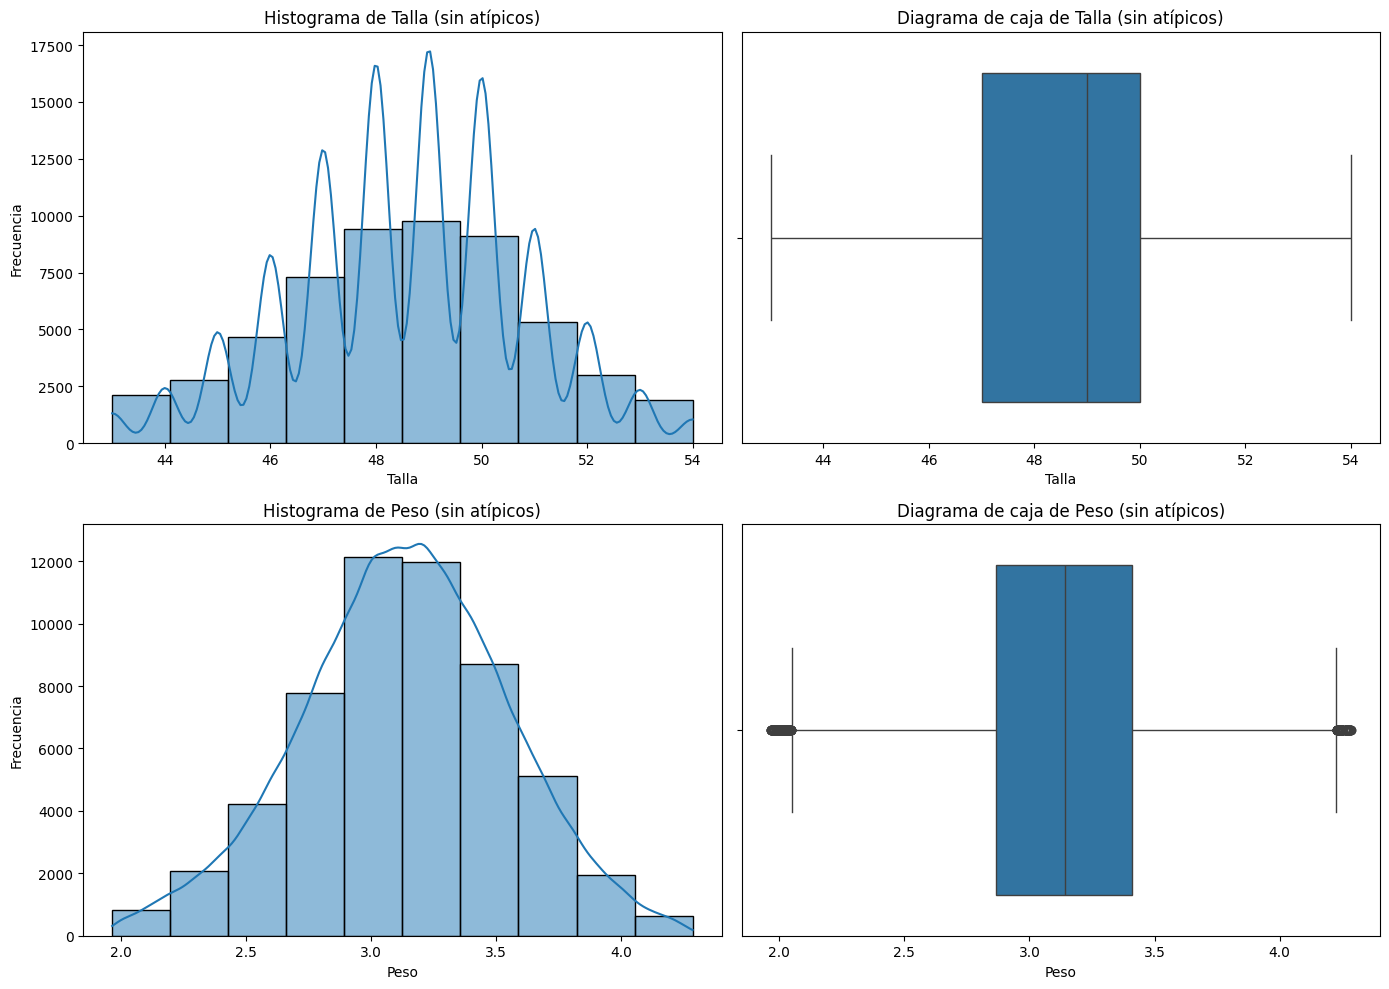

In [9]:
#histogramas sin outliers

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y boxplot para Talla
sns.histplot(df_sinatipicos['TALLA_NAC'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Talla')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de Talla (sin atípicos)')

sns.boxplot(x=df_sinatipicos['TALLA_NAC'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Talla')
axes[0, 1].set_title('Diagrama de caja de Talla (sin atípicos)')

# Histograma y boxplot para Peso
sns.histplot(df_sinatipicos['PESO_NAC'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Peso')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de Peso (sin atípicos)')

sns.boxplot(x=df_sinatipicos['PESO_NAC'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Peso')
axes[1, 1].set_title('Diagrama de caja de Peso (sin atípicos)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55409.
  res = hypotest_fun_out(*samples, **kwds)


Resultados de los tests de normalidad (valores p):

Variable: TALLA_NAC
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 480.0587, Crítico (5%): 0.7870
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)

Variable: PESO_NAC
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 13.0638, Crítico (5%): 0.7870
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



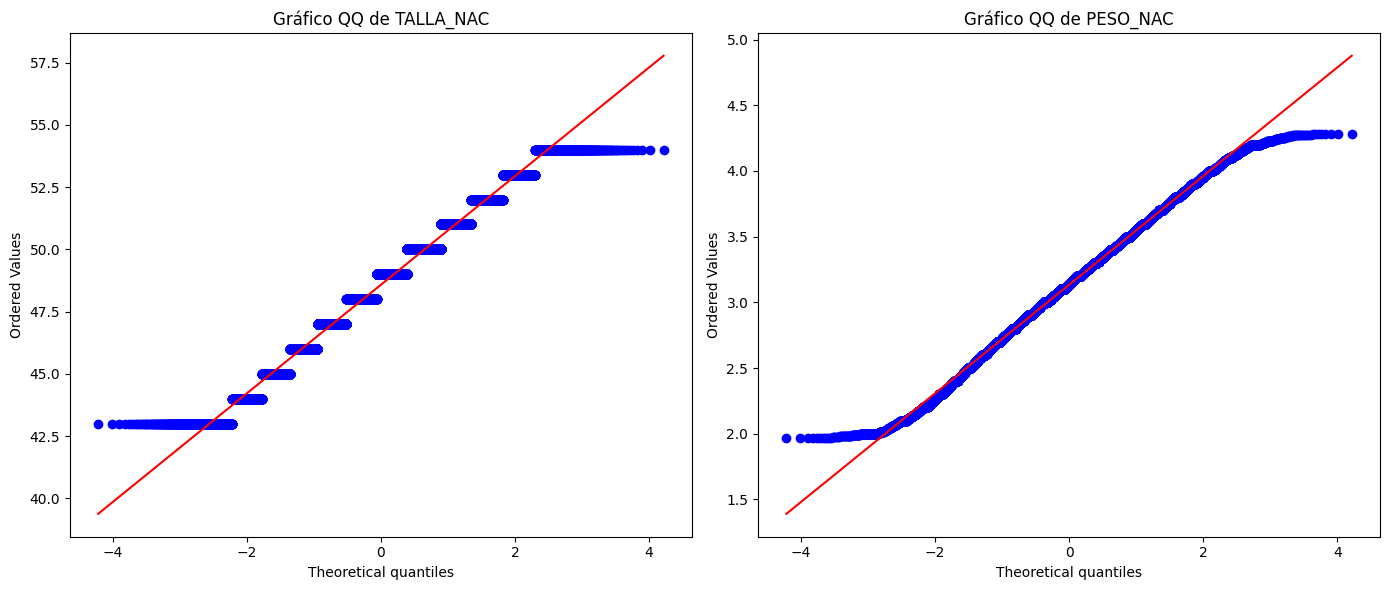

In [10]:
#Analisis de normalidad de variables despues de eliminiar outliers

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['TALLA_NAC', 'PESO_NAC']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_fisicas:
    # Use df_sinatipicos for analysis as it has been cleaned and outliers removed
    if col in df_sinatipicos.columns:
        datos = df_sinatipicos[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(columnas_fisicas):
    if col in df_sinatipicos.columns:
        probplot(df_sinatipicos[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()

# ***Las conclusiones***
Los resultados de los tests estadísticos de normalidad son contundentes y coinciden con las observaciones visuales de los histogramas y diagramas de caja (a pesar de la limpieza de outliers). Tanto la TALLA_NAC como el PESO_NAC no siguen una distribución normal. Los p-valores extremadamente bajos (menores que 0.05, que es el umbral común para rechazar la hipótesis nula de normalidad) para las pruebas de Shapiro-Wilk y Kolmogorov-Smirnov, así como el estadístico de Anderson-Darling superando con creces su valor crítico, confirman que hay suficiente evidencia para afirmar que estas variables no se distribuyen normalmente.

Esto es una información crucial para cualquier análisis posterior, ya que muchos métodos estadísticos asumen normalidad. Si necesitas realizar inferencias o modelados que dependen de esta suposición, deberás considerar transformaciones de datos o el uso de métodos estadísticos no paramétricos.

Análisis de Normalidad (Tests de Shapiro-Wilk, Kolmogorov-Smirnov y Anderson-Darling):



Los tests de normalidad ya ejecutados para TALLA_NAC y PESO_NAC arrojaron los siguientes resultados (p-valores cercanos a cero o estadísticos de Anderson-Darling muy superiores a sus valores críticos):




***Variable: TALLA_NAC***

Shapiro-Wilk p = 0.0000

Kolmogorov-Smirnov p = 0.0000

Anderson-Darling Estadístico: 480.0587, Crítico (5%): 0.7870 (El estadístico es mucho mayor que el valor crítico)

Conclusión: NO es distribución normal (según todos los tests)



***Variable: PESO_NAC***

Shapiro-Wilk p = 0.0000

Kolmogorov-Smirnov p = 0.0000

Anderson-Darling Estadístico: 13.0638, Crítico (5%): 0.7870 (El estadístico es mucho mayor que el valor crítico)

Conclusión: NO es distribución normal (según todos los tests)


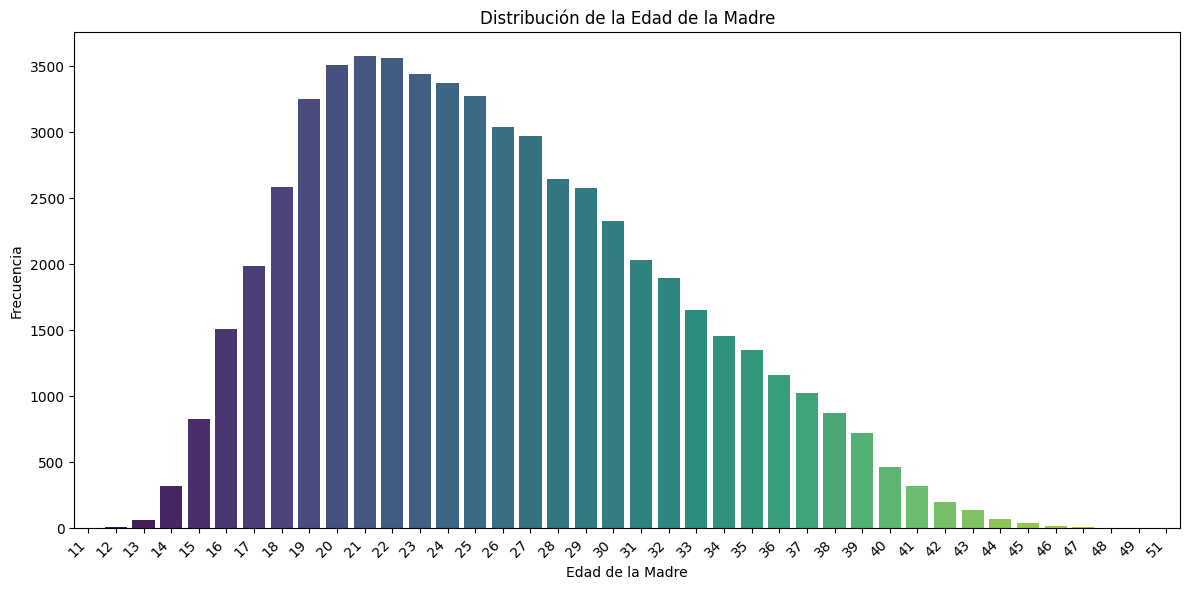

In [11]:
# No hay información acerca de las EPS entonces hice esta parte con la distribución de la edad de las Madres #

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='EDAD_MADRE', hue='EDAD_MADRE', palette='viridis', legend=False)
plt.title('Distribución de la Edad de la Madre')
plt.xlabel('Edad de la Madre')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

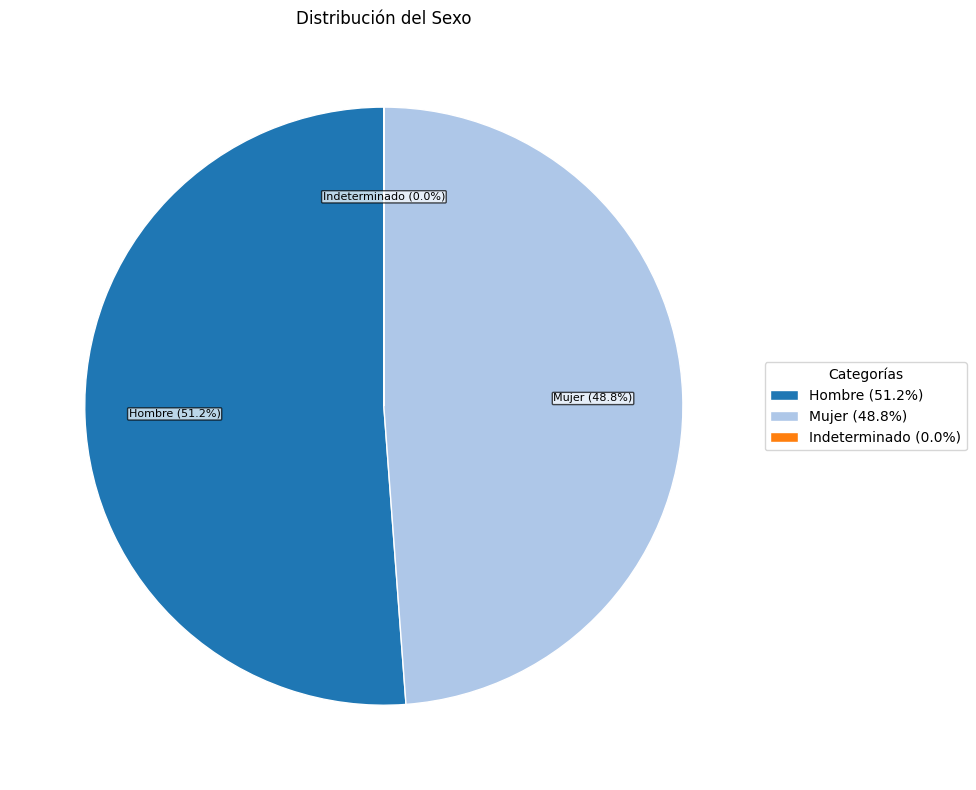

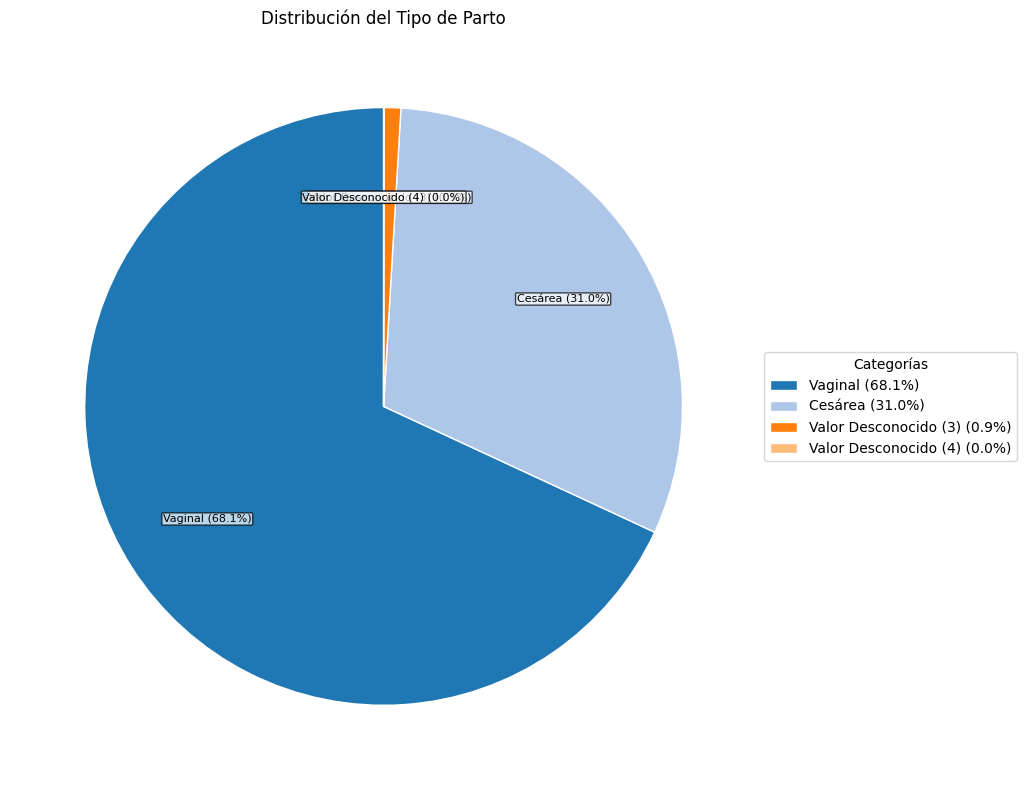

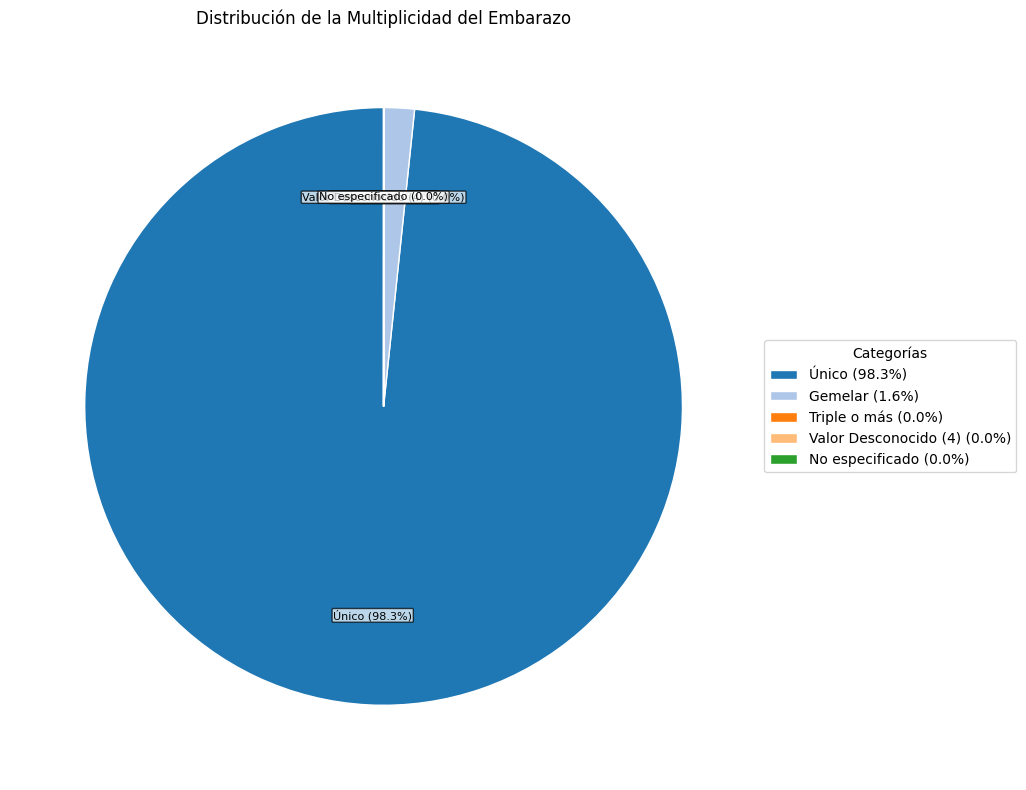

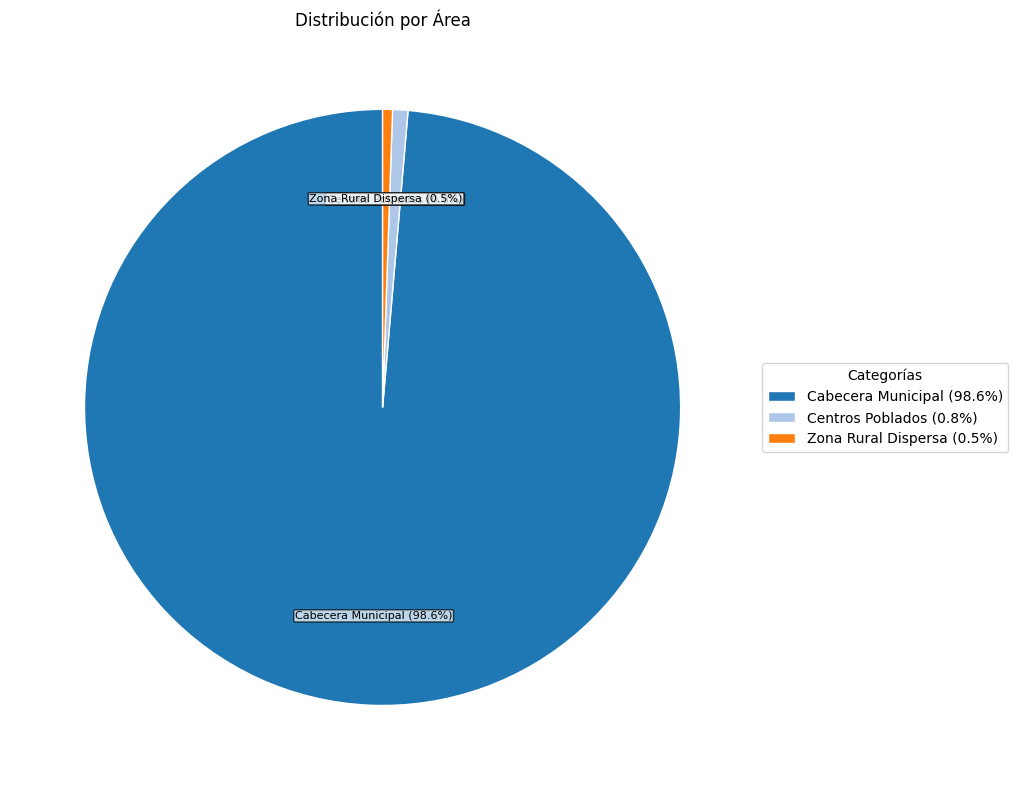

In [12]:
#graficos de torta

import matplotlib.pyplot as plt
import numpy as np # Import numpy for calculations

# Mappings for categorical variables
category_mappings = {
    'SEXO': {1: 'Hombre', 2: 'Mujer', 3: 'Indeterminado'},
    'TIPO_PARTO': {1: 'Vaginal', 2: 'Cesárea', 9: 'Otro/No especificado'}, # Assuming other values (e.g., 9) as 'Otro/No especificado'
    'MUL_PARTO': {1: 'Único', 2: 'Gemelar', 3: 'Triple o más', 9: 'No especificado'},
    'AREANAC': {1: 'Cabecera Municipal', 2: 'Centros Poblados', 3: 'Zona Rural Dispersa'}
}

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('SEXO', 'Distribución del Sexo'),
    ('TIPO_PARTO', 'Distribución del Tipo de Parto'),
    ('MUL_PARTO', 'Distribución de la Multiplicidad del Embarazo'),
    ('AREANAC', 'Distribución por Área')
]

for var, title in categorical_vars:
    plt.figure(figsize=(10, 8)) # Increased figure size to accommodate legend
    counts = df_filtrado[var].value_counts()

    # Get descriptive labels using the mappings
    descriptive_labels = [
        category_mappings[var].get(label_val, f'Valor Desconocido ({label_val})')
        for label_val in counts.index
    ]

    sizes = counts.values

    # Generate pie chart
    wedges, texts, autotexts = plt.pie(
        sizes,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        pctdistance=0.7, # Adjusted pctdistance to place labels slightly further from the center
        wedgeprops=dict(edgecolor='w') # Add white edge for better slice separation
    )

    # Add category labels to the autotexts (percentages) and adjust font size/properties
    for i, autotext in enumerate(autotexts):
        # Format: "Descriptive Label (Percentage%)"
        autotext.set_text(f'{descriptive_labels[i]} ({autotext.get_text()})')
        autotext.set_fontsize(8) # Reduced font size
        autotext.set_color('black') # Set text color
        # Optional: add a semi-transparent background to labels for better readability
        autotext.set_bbox(dict(boxstyle='round,pad=0.1', fc='white', alpha=0.7))

    # Create legend labels with percentages
    legend_labels_with_percentages = [
        f'{label} ({s/sum(sizes):.1%})' for label, s in zip(descriptive_labels, sizes)
    ]

    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.legend(wedges, legend_labels_with_percentages, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()
    plt.show()

🎯 ANALIZADOR ESTADÍSTICO DE DATOS DE NACIMIENTOS
Usando la ruta de archivo: /content/drive/MyDrive/Nacimientos_por_residencia_departamento_de_Caldas_20260204.csv
🚀 INICIANDO ANÁLISIS ESTADÍSTICO COMPLETO
CARGANDO Y EXPLORANDO DATOS
✓ Archivo cargado exitosamente: /content/drive/MyDrive/Nacimientos_por_residencia_departamento_de_Caldas_20260204.csv
✓ Dimensiones del dataset: (129938, 16)

--- INFORMACIÓN DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129938 entries, 0 to 129937
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   COD_DPTO    129938 non-null  int64  
 1   COD_MUNIC   129938 non-null  int64  
 2   AREANAC     129938 non-null  int64  
 3   SIT_PARTO   129938 non-null  int64  
 4   SEXO        129938 non-null  int64  
 5   PESO_NAC    129938 non-null  object 
 6   TALLA_NAC   129938 non-null  int64  
 7   ANO         129938 non-null  object 
 8   MES         129938 non-null  int64  
 9  

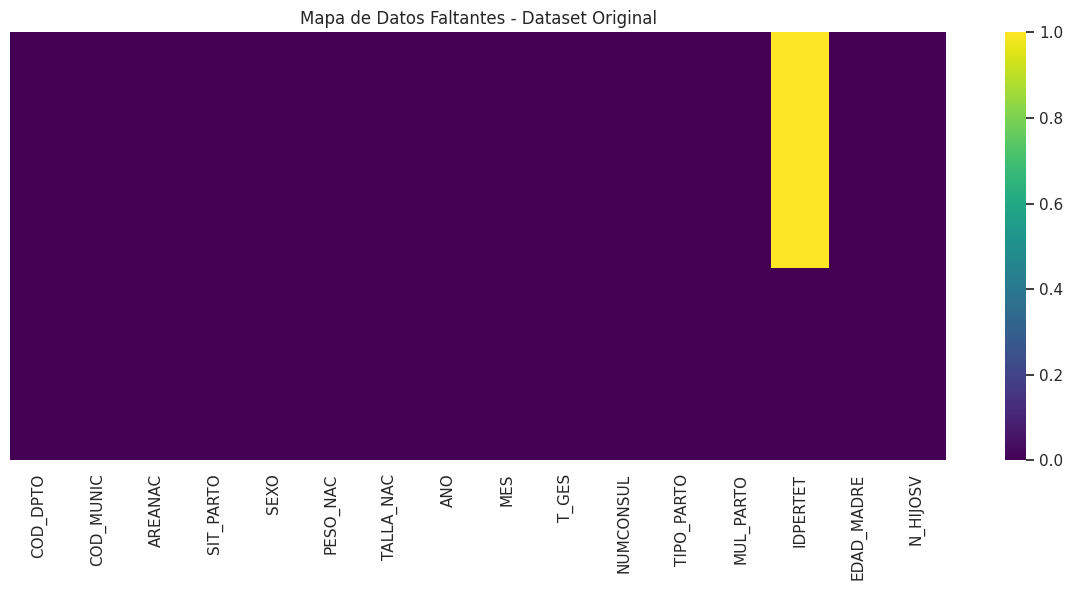


✓ Filas eliminadas: 71647
✓ Datos restantes: 58291
✓ Porcentaje de datos conservados: 44.9%


In [ ]:
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Nacimientos
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorNacimientos:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['PESO_NAC', 'TALLA_NAC', 'T_GES'] # Updated to use correct column names
        self.variables_categoricas = ['SEXO', 'TIPO_PARTO', 'MUL_PARTO', 'AREANAC'] # Updated to use correct column names

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            self.df_original = pd.read_csv(self.archivo)
            # Convert 'PESO_NAC' to numeric here as well, if needed for df_original operations
            # This is important if `limpiar_datos` or `eliminar_outliers` uses df_original for any calculations
            # before creating df_filtrado. Although for this specific setup, it's handled in limpiar_datos before use.

            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO ---")
            print(self.df_original.describe(include='all'))
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False
        return True

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS")
        print("="*60)

        # Convert 'PESO_NAC' before checking for nulls or dropping rows
        if 'PESO_NAC' in self.df_original.columns:
            self.df_original['PESO_NAC'] = self.df_original['PESO_NAC'].astype(str).str.replace(',', '.', regex=False)
            self.df_original['PESO_NAC'] = pd.to_numeric(self.df_original['PESO_NAC'], errors='coerce')

        faltantes = self.df_original.isnull().sum()
        faltantes = faltantes[faltantes > 0]
        if not faltantes.empty:
            print("--- VALORES FALTANTES POR COLUMNA ---")
            print(faltantes)
            plt.figure(figsize=(12, 6))
            sns.heatmap(self.df_original.isnull(), cbar=True, cmap="viridis", yticklabels=False)
            plt.title("Mapa de Datos Faltantes - Dataset Original")
            plt.tight_layout()
            plt.show()
        else:
            print("No se encontraron valores faltantes.")

        self.df_filtrado = self.df_original.dropna()
        filas_eliminadas = len(self.df_original) - len(self.df_filtrado)
        print(f"\n✓ Filas eliminadas: {filas_eliminadas}")
        print(f"✓ Datos restantes: {len(self.df_filtrado)}")
        print(f"✓ Porcentaje de datos conservados: {(len(self.df_filtrado)/len(self.df_original))*100:.1f}%")
        plt.figure(figsize=(12, 6))
        sns.heatmap(self.df_filtrado.isnull(), cbar=True, cmap="viridis", yticklabels=False)
        plt.title("Mapa de Datos Faltantes - Después de Limpieza")
        plt.tight_layout()
        plt.show()

    def eliminar_outliers(self):
        print("\n" + "="*60)
        print("ELIMINACIÓN DE VALORES ATÍPICOS")
        print("="*60)
        df = self.df_filtrado.copy() # Work on a copy to avoid SettingWithCopyWarning
        outliers_eliminados = {}
        for var in self.variables_numericas:
            if var in df.columns and pd.api.types.is_numeric_dtype(df[var]): # Check if numeric before calculating quantiles
                Q1 = df[var].quantile(0.25)
                Q3 = df[var].quantile(0.75)
                IQR = Q3 - Q1
                limite_inferior = Q1 - 1.5 * IQR
                limite_superior = Q3 + 1.5 * IQR
                mask = df[var].between(limite_inferior, limite_superior)
                outliers_eliminados[var] = (~mask).sum()
                df = df[mask]
                print(f"{var}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
                print(f"  Límites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
                print(f"  Outliers eliminados: {outliers_eliminados[var]}")
            else:
                print(f"⚠️  Variable '{var}' no es numérica o no está presente para el análisis de outliers.")

        self.df_sinatipicos = df
        total_eliminados = len(self.df_filtrado) - len(self.df_sinatipicos)
        print(f"\n✓ Total de registros eliminados por outliers: {total_eliminados}")
        print(f"✓ Datos finales: {len(self.df_sinatipicos)}")
        print(f"✓ Porcentaje conservado: {(len(self.df_sinatipicos)/len(self.df_original))*100:.1}%")

    def analizar_normalidad(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE NORMALIDAD")
        print("="*60)
        alpha = 0.05
        datasets = [("DATASET FILTRADO", self.df_filtrado), ("DATASET SIN OUTLIERS", self.df_sinatipicos)]
        for nombre, dataset in datasets:
            print(f"\n{nombre}:")
            print("-"*40)
            for var in self.variables_numericas:
                if var in dataset.columns and pd.api.types.is_numeric_dtype(dataset[var]): # Check if numeric
                    datos = dataset[var].dropna()
                    if len(datos) > 1: # Ensure enough data for shapiro test
                        # Shapiro-Wilk
                        stat_sw, p_sw = stats.shapiro(datos)
                        # Kolmogorov-Smirnov
                        media, desv = np.mean(datos), np.std(datos)
                        stat_ks, p_ks = stats.kstest(datos, "norm", args=(media, desv))
                        # Anderson-Darling
                        resultado_ad = stats.anderson(datos)
                        stat_ad = resultado_ad.statistic
                        # The critical values are at different indices for different alpha levels.
                        # Using the 5% level as an example, this might need adjustment.
                        # Default critical values are for [15%, 10%, 5%, 2.5%, 1%]
                        crit_ad = resultado_ad.critical_values[2]  # 5%
                        ad_normal = stat_ad < crit_ad
                        # Jarque-Bera
                        stat_jb, p_jb = stats.jarque_bera(datos)
                        resultado = "✓ Distribución NORMAL (no se rechaza H0)" if p_sw > alpha and p_ks > alpha and ad_normal and p_jb > alpha else "✗ Distribución NO NORMAL (se rechaza H0)"
                        print(f"{var}: Shapiro-Wilk={stat_sw:.4f}, p-valor={p_sw:.6f}, Curtosis={stats.kurtosis(datos):.3f}, Asimetría={stats.skew(datos):.3f}")
                        print(f"  Resultado: {resultado}\n")
                    else:
                        print(f"⚠️  {var}: No hay suficientes datos numéricos para realizar los tests de normalidad.")
                else:
                    print(f"⚠️  Variable '{var}' no es numérica o no está presente en {nombre}.")

    def crear_histogramas(self):
        print("\n" + "="*60)
        print("GENERANDO HISTOGRAMAS COMPARATIVOS")
        print("="*60)
        fig, axes = plt.subplots(2, len(self.variables_numericas), figsize=(6*len(self.variables_numericas), 12))
        fig.suptitle('Histogramas Comparativos: Original vs Sin Outliers', fontsize=16)
        for i, var in enumerate(self.variables_numericas):
            if var in self.df_filtrado.columns and pd.api.types.is_numeric_dtype(self.df_filtrado[var]):
                axes[0, i].hist(self.df_filtrado[var].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
                axes[0, i].set_title(f'{var} (Filtrado)')
                axes[0, i].set_xlabel(var)
                axes[0, i].set_ylabel('Frecuencia')
                axes[0, i].grid(True, alpha=0.3)
                axes[1, i].hist(self.df_sinatipicos[var].dropna(), bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
                axes[1, i].set_title(f'{var} (Sin Outliers)')
                axes[1, i].set_xlabel(var)
                axes[1, i].set_ylabel('Frecuencia')
                axes[1, i].grid(True, alpha=0.3)
            else:
                print(f"⚠️  Variable '{var}' no es numérica o no está presente para histogramas.")
        plt.tight_layout()
        plt.show()

    def crear_boxplots(self):
        print("\n" + "="*60)
        print("GENERANDO DIAGRAMAS DE CAJA")
        print("="*60)
        fig, axes = plt.subplots(1, len(self.variables_numericas), figsize=(6*len(self.variables_numericas), 6))
        fig.suptitle('Diagramas de Caja: Comparación de Datasets', fontsize=16)
        for i, var in enumerate(self.variables_numericas):
            if var in self.df_filtrado.columns and pd.api.types.is_numeric_dtype(self.df_filtrado[var]):
                data_to_plot = [self.df_filtrado[var].dropna(), self.df_sinatipicos[var].dropna()]
                box_plot = axes[i].boxplot(data_to_plot, labels=['Filtrado', 'Sin Outliers'], patch_artist=True)
                colors = ['lightblue', 'lightcoral']
                for patch, color in zip(box_plot['boxes'], colors):
                    patch.set_facecolor(color)
                axes[i].set_title(f'Boxplot - {var}')
                axes[i].set_ylabel(var)
                axes[i].grid(True, alpha=0.3)
            else:
                print(f"⚠️  Variable '{var}' no es numérica o no está presente para boxplots.")
        plt.tight_layout()
        plt.show()

    def analizar_categoricas(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
        print("="*60)
        # Ensure variables_categoricas are actually in the df_sinatipicos columns
        vars_disponibles = [var for var in self.variables_categoricas if var in self.df_sinatipicos.columns]

        if not vars_disponibles:
            print("⚠️  No se encontraron las variables categóricas esperadas.")
            print(f"Variables disponibles: {list(self.df_sinatipicos.columns)}")
            return

        # Dynamically determine subplot layout
        n_vars = len(vars_disponibles)
        # Max 3 columns for better visualization
        n_cols = min(n_vars, 3)
        n_rows = (n_vars + n_cols - 1) // n_cols # Ceiling division

        fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(6 * n_cols, 5 * n_rows))
        axes = axes.flatten() # Flatten for easier iteration

        for i, var in enumerate(vars_disponibles):
            current_ax_pie = axes[i]
            current_ax_bar = axes[i + n_cols] # For the bar chart below the pie chart

            datos_var = self.df_sinatipicos[var].value_counts()
            if not datos_var.empty:
                current_ax_pie.pie(datos_var.values, labels=datos_var.index, autopct='%1.1f%%', startangle=90)
                current_ax_pie.set_title(f'Distribución - {var}')

                datos_var.plot(kind='bar', ax=current_ax_bar, color='steelblue')
                current_ax_bar.set_title(f'Frecuencias - {var}')
                current_ax_bar.set_xlabel(var)
                current_ax_bar.set_ylabel('Frecuencia')
                current_ax_bar.tick_params(axis='x', rotation=45)

                print(f"\n{var}:")
                for categoria, freq in datos_var.items():
                    pct = (freq / len(self.df_sinatipicos)) * 100
                    print(f"  {categoria}: {freq} ({pct:.1f}%)")
            else:
                print(f"⚠️  Variable '{var}' no tiene datos válidos para el análisis categórico.")

        # Hide any unused subplots
        for j in range(len(vars_disponibles) * 2, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    def analizar_variables_adicionales(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE VARIABLES ADICIONALES")
        print("="*60)
        variables_adicionales = ['EDAD_MADRE', 'N_HIJOSV'] # Updated to use correct column names
        for var in variables_adicionales:
            if var in self.df_sinatipicos.columns:
                print(f"\n--- Analizando {var} ---")
                plt.figure(figsize=(12, 6))
                if pd.api.types.is_numeric_dtype(self.df_sinatipicos[var]):
                    plt.subplot(1, 2, 1)
                    sns.histplot(self.df_sinatipicos[var].dropna(), bins=20, kde=True, edgecolor='black', color='skyblue')
                    plt.title(f'Histograma - {var}')
                    plt.xlabel(var)
                    plt.ylabel('Frecuencia')
                    plt.subplot(1, 2, 2)
                    sns.boxplot(x=self.df_sinatipicos[var].dropna(), color='lightcoral')
                    plt.title(f'Boxplot - {var}')
                    plt.xlabel(var)
                    datos = self.df_sinatipicos[var].dropna()
                    print(f"  Media: {datos.mean():.2f}")
                    print(f"  Mediana: {datos.median():.2f}")
                    print(f"  Desv. Estándar: {datos.std():.2f}")
                else:
                    top_categorias = self.df_sinatipicos[var].value_counts().head(10)
                    top_categorias.plot(kind='bar', color='steelblue')
                    plt.title(f'Top 10 Categorías - {var}')
                    plt.xlabel(var)
                    plt.ylabel('Frecuencia')
                    plt.xticks(rotation=45, ha='right')
                    print(f"  Total de categorías únicas: {self.df_sinatipicos[var].nunique()}")
                    print("  Top 5 categorías:")
                    for cat, freq in top_categorias.head().items():
                        print(f"    {cat}: {freq}")
                plt.tight_layout()
                plt.show()
            else:
                print(f"⚠️  Variable '{var}' no encontrada en el dataset")

    def calcular_estadisticas(self):
        print("\n" + "="*60)
        print("MEDIDAS ESTADÍSTICAS DESCRIPTIVAS")
        print("="*60)
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns and pd.api.types.is_numeric_dtype(self.df_sinatipicos[var]):
                datos = self.df_sinatipicos[var].dropna()
                if not datos.empty:
                    print(f"\n{var.upper()}:\n{'-'*30}")
                    print(f"{'Medida':<20} {'Valor':<10}")
                    print(f"{'-'*30}")
                    print(f"{'Media':<20} {datos.mean():<10.2f}")
                    print(f"{'Mediana':<20} {datos.median():<10.2f}")
                    if not datos.mode().empty:
                        print(f"{'Moda':<20} {datos.mode().iloc[0]:<10.2f}")
                    else:
                        print(f"{'Moda':<20} {'N/A':<10}")
                    print(f"{'Desv. Estándar':<20} {datos.std():<10.2f}")
                    print(f"{'Varianza':<20} {datos.var():<10.2f}")
                    if datos.mean() != 0:
                        print(f"{'Coef. Variación':<20} {(datos.std()/datos.mean())*100:<10.2f}%")
                    else:
                        print(f"{'Coef. Variación':<20} {'N/A':<10}")
                    print(f"{'Rango':<20} {datos.max() - datos.min():<10.2f}")
                    print(f"{'Mínimo':<20} {datos.min():<10.2f}")
                    print(f"{'Máximo':<20} {datos.max():<10.2f}")
                    print(f"{'Q1 (25%)':<20} {datos.quantile(0.25):<10.2f}")
                    print(f"{'Q3 (75%)':<20} {datos.quantile(0.75):<10.2f}")
                    print(f"{'IQR':<20} {datos.quantile(0.75) - datos.quantile(0.25):<10.2f}")
                    print(f"{'Asimetría':<20} {stats.skew(datos):<10.3f}")
                    print(f"{'Curtosis':<20} {stats.kurtosis(datos):<10.3f}")
                else:
                    print(f"⚠️  {var}: No hay datos para calcular estadísticas descriptivas.")
            else:
                print(f"⚠️  Variable '{var}' no es numérica o no está presente para estadísticas.")

    def generar_reporte_final(self):
        print("\n" + "="*60)
        print("REPORTE FINAL DEL ANÁLISIS")
        print("="*60)
        print(f"📊 RESUMEN DE DATOS:")
        print(f"   • Registros originales: {len(self.df_original):,}")
        print(f"   • Registros después de limpieza: {len(self.df_filtrado):,}")
        print(f"   • Registros finales (sin outliers): {len(self.df_sinatipicos):,}")
        print(f"   • Porcentaje de datos conservados: {(len(self.df_sinatipicos)/len(self.df_original))*100:.1f}%")
        print(f"\n🔍 VARIABLES ANALIZADAS:")
        print(f"   • Variables numéricas: {', '.join(self.variables_numericas)}")
        print(f"   • Variables categóricas: {', '.join(self.variables_categoricas)}")
        print(f"\n📈 HALLAZGOS PRINCIPALES:")
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns and pd.api.types.is_numeric_dtype(self.df_sinatipicos[var]):
                datos = self.df_sinatipicos[var].dropna()
                if len(datos) > 1: # Ensure enough data for shapiro test
                    _, p = stats.shapiro(datos)
                    normalidad = "Normal" if p > 0.05 else "No Normal"
                    print(f"   • {var}: Distribución {normalidad} (p={p:.4f})")
                else:
                    print(f"   • {var}: No hay suficientes datos para evaluar la normalidad.")
        print(f"\n✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
        print(f"   • Dataset limpio y preparado para análisis avanzados")
        print(f"   • Todas las visualizaciones generadas")
        print(f"   • Estadísticas descriptivas calculadas")

    def ejecutar_analisis_completo(self):
        print("🚀 INICIANDO ANÁLISIS ESTADÍSTICO COMPLETO")
        print("="*60)
        if not self.cargar_datos():
            return False
        self.limpiar_datos()
        self.eliminar_outliers()
        self.analizar_normalidad()
        self.crear_histogramas()
        self.crear_boxplots()
        self.analizar_categoricas()
        self.analizar_variables_adicionales()
        self.calcular_estadisticas()
        self.generar_reporte_final()
        return True

def main():
    print("🎯 ANALIZADOR ESTADÍSTICO DE DATOS DE NACIMIENTOS")
    print("="*60)
    # Pre-filling the file path for convenience, as done in previous cells
    archivo = '/content/drive/MyDrive/Nacimientos_por_residencia_departamento_de_Caldas_20260204.csv'
    print(f"Usando la ruta de archivo: {archivo}")

    analizador = AnalizadorNacimientos(archivo)
    try:
        success = analizador.ejecutar_analisis_completo()
        if success:
            print("\n🎉 ¡ANÁLISIS COMPLETADO CON ÉXITO!")
        else:
            print("\n❌ El análisis no pudo completarse")
    except KeyboardInterrupt:
        print("\n\n⚠️  Análisis interrumpido por el usuario")
    except Exception as e:
        print(f"\n❌ Error durante el análisis: {e}")

if __name__ == "__main__":
    main()